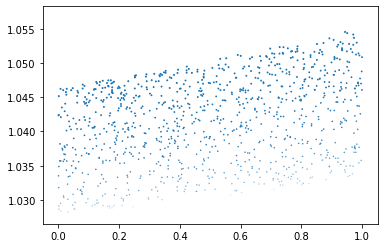

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x=np.random.rand(1000)
y=np.random.rand(x.size)
a=0.56
b=9
c=3

z=np.sqrt((x+a)/abs(y-b)**c)+1

plt.scatter(y,z,x)

In [56]:
# Python3 program to construct binary  
# tree from given array in level  
# order fashion Tree Node  
  
# Helper function that allocates a  
#new node 
from math import *
class newNode: 
    def __init__(self, data): 
        self.data = data  
        self.left = self.right = None
  
# Function to insert nodes in level order  
def insertLevelOrder(arr, root, i, n): 
      
    # Base case for recursion  
    if i < n: 
        temp = newNode(arr[i])  
        root = temp  
  
        # insert left child  
        root.left = insertLevelOrder(arr, root.left, 
                                     2 * i + 1, n)  
  
        # insert right child  
        root.right = insertLevelOrder(arr, root.right, 
                                      2 * i + 2, n) 
    return root 
  
# Function to print tree nodes in  
# InOrder fashion  
def inOrder(root): 
    if root != None: 
        inOrder(root.left)  
        print(root.data,end=" ")  
        inOrder(root.right) 
  
# Driver Code 
if __name__ == '__main__': 
    arr = [1, 2, 3, 4, 5, 6, 6, 6, 6] 
    n = len(arr) 
    root = None
    root = insertLevelOrder(arr, root, 0, n)  
    inOrder(root) 
      
# This code is contributed by PranchalK 


6 4 6 2 5 1 6 3 6 

3
2
1


(sin(1+{}))/5
0.1682941969615793
14.112000805986721


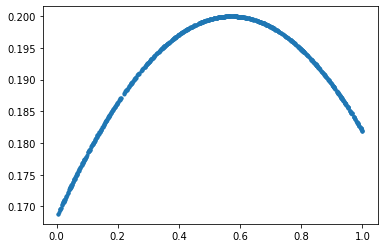

In [75]:
ops = ["sin", "cos", "tan", "+", "/", "*", "-", "**"]
max_depth=3

def generate_tree(max_depth):
    while max_depth > 0:
        print(max_depth)
        max_depth -= 1
    


def binary(a,op,b):
    return {'_left':a,'_op':op,'_right':b}

def unary(op,a):
    return {'_op':op, '_right':a}

def traverse(data,string=''):
    for k in ['_left','_op','_right']:
        if k not in data:
            pass
        elif isinstance(data[k],dict):
            string+=('('+traverse(data[k])+')')
        else:
            string+=str(data[k])
    return string


data=binary(unary('sin',binary(1,'+','{}')),'/',5)
print(traverse(data))
print(eval(traverse(data).format(0)))
print(eval("100*(sin(3))"))
plt.plot(x,[eval(traverse(data).format(i)) for i in x],'.')


In [26]:
data

{'_left': {'_op': 'sin', '_right': {'_left': 1, '_op': '+', '_right': 'x'}},
 '_op': '/',
 '_right': 5}

In [27]:
string = ""
for k in ['_left','_op','_right']:
    if k not in data:
        print(k)
        pass
    else:
        print(k, 'data')
#     elif isinstance(data[k],dict):
#         string+=('('+traverse(data[k])+')')
#     else:
#         string+=str(data[k])

_left data
_op data
_right data


In [127]:
import pydot

In [83]:
import random
random.random()

0.8465754479023688

In [157]:
class tree_generator():
    
    def __init__(self, variables, r=10):
        self.unary_root_ops = ['sin', 'cos', 'tan', '-']
        self.binary_root_ops = ['**', '*', '+', '-', '/', ]
        self.all_ops = ["sin", "cos", "tan", "+", "/", "*", "-", "**"]
        self.bin_ops = ["+", "/", "*", "-", "**"]
        self.unary_ops = ["sin", "cos", "tan", "+", "/", "*", "-", "**"]
        self.unary_after_binary = ["sin", "cos", "tan"]
        self.unary_after_unary_ops = ["-", "sin", "cos", "tan"]
        self.variables = variables
        self.r = r
        
    def generate_tree(self, max_depth, parent):
        if max_depth > 0:
            d = random.random()
            if d > 0.5:
                #unary
                d = random.random()
                if parent == "binary":
                    if d > 0.5:
                        op = np.random.choice(self.unary_after_binary)
                    else:
                        op = ""
                elif parent == "unary":
#                     op = np.random.choice(self.unary_ops)
                    if d > 0.5:
                        op = np.random.choice(self.unary_after_unary_ops)
                    else:
                        op = ""
                if op == "":
                    return self.generate_tree(max_depth - 1, parent="unary")
                
                return unary(op, self.generate_tree(max_depth - 1, parent="unary"))
            else:
                #binary
    #             return binary()
                op = np.random.choice(self.bin_ops)
                return binary(self.generate_tree(max_depth - 1, parent="binary"), 
                              op, 
                              self.generate_tree(max_depth - 1, parent="binary"))

        else:
            d = random.random()
            if d > 0.5:
                #use variable
                return np.random.choice(self.variables)
            else:
                #use constant
                return ("({})".format(
                    round(np.random.uniform(-1*self.r, self.r), 2)))
        
    def init_tree(self, max_depth):
        #initializes root node
        d = random.random()
        if d > 0.5:
            op = np.random.choice(self.unary_root_ops)
            return unary(op, self.generate_tree(max_depth - 1, parent="unary"))
        else:
            op = np.random.choice(self.binary_root_ops)
            return binary(self.generate_tree(max_depth - 1, parent="binary"), 
                          op, 
                          self.generate_tree(max_depth - 1, parent="binary"))
    
        
t = tree_generator(["(var)"])
s = t.init_tree(3)

print(s)
traverse(s)

{'_left': {'_left': '(-6.91)', '_op': '*', '_right': {'_left': '(-1.69)', '_op': '**', '_right': '(var)'}}, '_op': '**', '_right': {'_left': {'_left': '(-0.22)', '_op': '+', '_right': '(var)'}, '_op': '+', '_right': {'_op': 'tan', '_right': '(-2.16)'}}}


'((-6.91)*((-1.69)**(var)))**(((-0.22)+(var))+(tan(-2.16)))'

In [151]:
class PrintTree:
    """source: https://ebadahmadzadeh.wordpress.com/2014/02/26/how-to-print-a-dictionary-based-tree-in-python/"""
    def printTree(self, tree, d = 0):
        if (tree == None or len(tree) == 0):
            print("\t" * d, "-")
        else:
            for key, val in tree.items():
                if (isinstance(val, dict)):
                    print( "\t" * d, key)
                    self.printTree(val, d+1)
                else:
                    print ("\t" * d, key, str('(') + val + str(')'))

In [145]:
t = tree_generator()
s = t.init_tree(5)

print(traverse(s))
p = PrintTree()
p.printTree(s)

-(tan(tan(var)))
 _op (-)
 _right
	 _op (tan)
	 _right
		 _op (tan)
		 _right ((var))


In [146]:
s

{'_op': '-',
 '_right': {'_op': 'tan', '_right': {'_op': 'tan', '_right': '(var)'}}}